<a href="https://colab.research.google.com/github/shreya12-hash/Data-Science-Machine-Learning-Artificial-Intelligence-Enthusiast/blob/master/Visualization%20of%20Time%20Series%20Data%20of%20COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this analysis, I compare the COVID-19 disease progression in World and as well as in the indian subcontinent.Indian subcontinent and indian government also gives us an opportunity to study the effect of lockdown.India,Bangladesh ,China,Nepal Bhutan,Sri-Lanka fllowed National Lockdown but Pakistan is the only country in India subcontinent does not adopt national lockdown policy.As a result it gives as an unique opportunity to study the effect of lock-down.We also study some specific  countries such as the most affected country USA ,due to many reasons they are still now unable to prevent  the spread of COVID-19 whereas other country such as Australia,France,Italy are able to prevent gradually the spread.It can be predicted by July Daily new cases in Australia becomes zero.Now we analyze the effect of global lockdown strategy.**

**Data Source**: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [20, 10]
from IPython import display
from ipywidgets import interact, widgets

## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveredcases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [12]:
ConfirmedCases_raw.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801
266,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [13]:
Deaths_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [14]:
recoveredcases_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14


In [0]:
### Melt the dateframe into the right shape and set index
'''melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns,
 considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.'''
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Province/State','Country/Region','Date'])
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(recoveredcases_raw)

In [16]:
ConfirmedCases

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/13/20   0.186360   6.613081    220
               Yemen                 5/13/20  15.552727  48.516388     70
               Comoros               5/13/20 -11.645500  43.333300     11
               Tajikistan            5/13/20  38.861034  71.276093    801
               Lesotho               5/13/20 -29.609988  28.233608      1

[30171 rows x 3 columns]

In [18]:
Deaths

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/13/20   0.186360   6.613081      6
               Yemen                 5/13/20  15.552727  48.516388     12
               Comoros               5/13/20 -11.645500  43.333300      1
               Tajikistan            5/13/20  38.861034  71.276093     23
               Lesotho               5/13/20 -29.609988  28.233608      0

[30171 rows x 3 columns]

In [19]:
Recoveries

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/13/20   0.186360   6.613081      4
               Yemen                 5/13/20  15.552727  48.516388      1
               Comoros               5/13/20 -11.645500  43.333300      0
               Tajikistan            5/13/20  38.861034  71.276093      0
               Lesotho               5/13/20 -29.609988  28.233608      0

[28589 rows x 3 columns]

**Using groupby method we grouped 'Country/Region' & 'Date' and find total confirmed ,death and recoveries using sum() function and then we calculate Active cases, Daily New Cases, Daily New Deaths,new recoveries.**

In [0]:
def countrydata(df_cleaned,oldname,newname):
    df_country=df_cleaned.groupby(['Country/Region','Date'])['Cases'].sum().reset_index()
    df_country=df_country.set_index(['Country/Region','Date'])
    df_country.index=df_country.index.set_levels([df_country.index.levels[0], pd.to_datetime(df_country.index.levels[1])])#*
    df_country=df_country.groupby(level=0).fillna(0)
    df_country=df_country.sort_values(['Country/Region','Date'],ascending=True)
    #df_country=df_country.groupby(level=0).fillna(0)
    df_country=df_country.rename(columns={oldname:newname})
    return df_country
  
ConfirmedCasesCountry=countrydata(ConfirmedCases,'Cases','Total Confirmed Cases')
DeathsCountry=countrydata(Deaths,'Cases','Total Deaths')
RecoveriesCountry=countrydata(Recoveries,'Cases','Total Recoveries')

### Get DailyData from Cumulative sum
def dailydata(dfcountry,oldname,newname):
    dfcountrydaily=dfcountry.groupby(level=0).diff().fillna(0)#*
    dfcountrydaily=dfcountrydaily.rename(columns={oldname:newname})
    return dfcountrydaily
NewCasesCountry=dailydata(ConfirmedCasesCountry,'Total Confirmed Cases','Daily New Cases')
NewDeathsCountry=dailydata(DeathsCountry,'Total Deaths','Daily New Deaths')
NewRecoveriesCountry=dailydata(RecoveriesCountry,'Total Recoveries','Daily New Recoveries')

In [21]:
ConfirmedCasesCountry.tail()

Total Confirmed Cases
Country/Region Date                             
Zimbabwe       2020-05-09                     35
               2020-05-10                     36
               2020-05-11                     36
               2020-05-12                     36
               2020-05-13                     37

In [22]:
DeathsCountry.head()

Total Deaths
Country/Region Date                    
Afghanistan    2020-01-22             0
               2020-01-23             0
               2020-01-24             0
               2020-01-25             0
               2020-01-26             0

In [23]:
RecoveriesCountry.head()

Total Recoveries
Country/Region Date                        
Afghanistan    2020-01-22                 0
               2020-01-23                 0
               2020-01-24                 0
               2020-01-25                 0
               2020-01-26                 0

In [24]:
NewCasesCountry

Daily New Cases
Country/Region Date                       
Afghanistan    2020-01-22              0.0
               2020-01-23              0.0
               2020-01-24              0.0
               2020-01-25              0.0
               2020-01-26              0.0
...                                    ...
Zimbabwe       2020-05-09              1.0
               2020-05-10              1.0
               2020-05-11              0.0
               2020-05-12              0.0
               2020-05-13              1.0

[21244 rows x 1 columns]

In [53]:
NewDeathsCountry

Daily New Deaths
Country/Region Date                        
Afghanistan    2020-01-22               0.0
               2020-01-23               0.0
               2020-01-24               0.0
               2020-01-25               0.0
               2020-01-26               0.0
...                                     ...
Zimbabwe       2020-05-09               0.0
               2020-05-10               0.0
               2020-05-11               0.0
               2020-05-12               0.0
               2020-05-13               0.0

[21244 rows x 1 columns]

In [25]:
NewRecoveriesCountry

Daily New Recoveries
Country/Region Date                            
Afghanistan    2020-01-22                   0.0
               2020-01-23                   0.0
               2020-01-24                   0.0
               2020-01-25                   0.0
               2020-01-26                   0.0
...                                         ...
Zimbabwe       2020-05-09                   0.0
               2020-05-10                   0.0
               2020-05-11                   0.0
               2020-05-12                   0.0
               2020-05-13                   3.0

[21244 rows x 1 columns]

**Using 'pd.merge' function we merge the previous created dataframes and calculate active cases in order to analyze how many people are still suffering from COVID-19,Death to Cases Ratio & 'Share of Recoveries -Closed Cases'and create a DataFrame CountryConsolidated**

In [26]:

CountryConsolidated=pd.merge(ConfirmedCasesCountry,NewCasesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,DeathsCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,NewDeathsCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,RecoveriesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,NewRecoveriesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated['Active Cases']=CountryConsolidated['Total Confirmed Cases']-CountryConsolidated['Total Deaths']-CountryConsolidated['Total Recoveries']
CountryConsolidated['Share of Recoveries - Closed Cases']=np.round(CountryConsolidated['Total Recoveries']/(CountryConsolidated['Total Recoveries']+CountryConsolidated['Total Deaths']),2)#*
CountryConsolidated['Death to Cases Ratio']=np.round(CountryConsolidated['Total Deaths']/CountryConsolidated['Total Confirmed Cases'],3)#*
CountryConsolidated.tail(2)

Total Confirmed Cases  ...  Death to Cases Ratio
Country/Region Date                               ...                      
Zimbabwe       2020-05-12                     36  ...                 0.111
               2020-05-13                     37  ...                 0.108

[2 rows x 9 columns]

In [27]:
CountryConsolidated

Total Confirmed Cases  ...  Death to Cases Ratio
Country/Region Date                               ...                      
Afghanistan    2020-01-22                      0  ...                   NaN
               2020-01-23                      0  ...                   NaN
               2020-01-24                      0  ...                   NaN
               2020-01-25                      0  ...                   NaN
               2020-01-26                      0  ...                   NaN
...                                          ...  ...                   ...
Zimbabwe       2020-05-09                     35  ...                 0.114
               2020-05-10                     36  ...                 0.111
               2020-05-11                     36  ...                 0.111
               2020-05-12                     36  ...                 0.111
               2020-05-13                     37  ...                 0.108

[21244 rows x 9 columns]

**In order to visualize how the pandemic becomes dangerous day by day in each country(top 20 countries in aspect of total confirmed cases,death cases and recoveries
In order to do this we use loc function on 'CountryConsolidated' DataFrame to find the location of that country which are in row**

In [28]:
In=CountryConsolidated.loc['India']
In

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,62808,3113.0,2101,116.0,19301,1414.0,41406,0.90,0.033
2020-05-10,67161,4353.0,2212,111.0,20969,1668.0,43980,0.90,0.033
2020-05-11,70768,3607.0,2294,82.0,22549,1580.0,45925,0.91,0.032


In [50]:
In=In.dropna()
x1=In['Share of Recoveries - Closed Cases'].mean()
x1

0.8659090909090913

In [51]:
In=In.dropna()
x2=In['Death to Cases Ratio'].mean()
x2

0.02055681818181818

In [52]:
In['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
In['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
In

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-02-16,3,0.0,0,0.0,3,3.0,0,1.00,0.000
2020-02-17,3,0.0,0,0.0,3,0.0,0,1.00,0.000
2020-02-18,3,0.0,0,0.0,3,0.0,0,1.00,0.000
2020-02-19,3,0.0,0,0.0,3,0.0,0,1.00,0.000
2020-02-20,3,0.0,0,0.0,3,0.0,0,1.00,0.000
...,...,...,...,...,...,...,...,...,...
2020-05-09,62808,3113.0,2101,116.0,19301,1414.0,41406,0.90,0.033
2020-05-10,67161,4353.0,2212,111.0,20969,1668.0,43980,0.90,0.033
2020-05-11,70768,3607.0,2294,82.0,22549,1580.0,45925,0.91,0.032


In [29]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=In.index, y=In['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=In.index,y=In['Total Deaths']),go.Bar(name='Total Recoveries',x=In.index,y=In['Total Recoveries']),go.Bar(name='Active Cases',x=In.index,y=In['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of India',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [30]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=In.index, y=In['Daily New Cases']), go.Bar(name='Daily New Deaths',x=In.index,y=In['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=In.index,y=In['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of India',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [31]:
!pip install pygal



     |████████████████████████████████| 133kB 9.2MB/s 


In [32]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.8MB/s 


In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [33]:
import pygal
import cufflinks as cf
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [34]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries','Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [35]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [36]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths','Daily New Recoveries'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Daily New Cases(Confirmed,Death,Recoveries)',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [37]:
fig=In.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [38]:
chartcol='Red'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=In.index,y=In['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=In.index,y=In['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=In.index,y=In['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=In.index,y=In['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=In.index,y=In['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=In.index,y=In['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [39]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='red'
    )
fig.show()

In [40]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Death Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [41]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    color='purple'
    )
fig.show()

In [42]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Death Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='green'
    )
fig.show()

In [43]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle=' Daily New Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='blue'
    )
fig.show()

In [45]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of India',
    color='violet'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    color='pink'
    )
fig.show()

In [46]:
fig=In.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [47]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [48]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [49]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
It=CountryConsolidated.loc['Italy']
It

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,218268,1083.0,30395,194.0,103031,4008.0,84842,0.77,0.139
2020-05-10,219070,802.0,30560,165.0,105186,2155.0,83324,0.77,0.139
2020-05-11,219814,744.0,30739,179.0,106587,1401.0,82488,0.78,0.140


In [0]:
Ca=CountryConsolidated.loc['Canada']
Ca

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,1,1.0,0,0.0,0,0.0,1,NaN,0.000
...,...,...,...,...,...,...,...,...,...
2020-05-09,68918,1244.0,4823,126.0,31262,1023.0,32833,0.87,0.070
2020-05-10,70091,1173.0,4991,168.0,32109,847.0,32991,0.87,0.071
2020-05-11,71264,1173.0,5115,124.0,33007,898.0,33142,0.87,0.072


In [0]:
Gr=CountryConsolidated.loc['Germany']
Gr

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,171324,736.0,7549,39.0,143300,1600.0,20475,0.95,0.044
2020-05-10,171879,555.0,7569,20.0,144400,1100.0,19910,0.95,0.044
2020-05-11,172576,697.0,7661,92.0,145617,1217.0,19298,0.95,0.044


In [0]:
US=CountryConsolidated.loc['US']
US

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,1,0.0,0,0.0,0,0.0,1,NaN,0.00
2020-01-23,1,0.0,0,0.0,0,0.0,1,NaN,0.00
2020-01-24,2,1.0,0,0.0,0,0.0,2,NaN,0.00
2020-01-25,2,0.0,0,0.0,0,0.0,2,NaN,0.00
2020-01-26,5,3.0,0,0.0,0,0.0,5,NaN,0.00
...,...,...,...,...,...,...,...,...,...
2020-05-09,1309550,25621.0,78795,1615.0,212534,13541.0,1018221,0.73,0.06
2020-05-10,1329260,19710.0,79526,731.0,216169,3635.0,1033565,0.73,0.06
2020-05-11,1347881,18621.0,80682,1156.0,232733,16564.0,1034466,0.74,0.06


In [0]:
Tu=CountryConsolidated.loc['Turkey']
Tu

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,137115,1546.0,3739,50.0,89480,3084.0,43896,0.96,0.027
2020-05-10,138657,1542.0,3786,47.0,92691,3211.0,42180,0.96,0.027
2020-05-11,139771,1114.0,3841,55.0,95780,3089.0,40150,0.96,0.027


In [0]:
Bra=CountryConsolidated.loc['Brazil']
Bra

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,156061,9167.0,10656,639.0,61685,2388.0,83720,0.85,0.068
2020-05-10,162699,6638.0,11123,467.0,64957,3272.0,86619,0.85,0.068
2020-05-11,169594,6895.0,11653,530.0,67384,2427.0,90557,0.85,0.069


In [0]:
Russia=CountryConsolidated.loc['Russia']
Russia

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,198676,10817.0,1827,104.0,31916,5308.0,164933,0.95,0.009
2020-05-10,209688,11012.0,1915,88.0,34306,2390.0,173467,0.95,0.009
2020-05-11,221344,11656.0,2009,94.0,39801,5495.0,179534,0.95,0.009


In [0]:
UK=CountryConsolidated.loc['United Kingdom']
UK

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,216525,3896.0,31662,346.0,1001,4.0,183862,0.03,0.146
2020-05-10,220449,3924.0,31930,268.0,1002,1.0,187517,0.03,0.145
2020-05-11,224332,3883.0,32141,211.0,1015,13.0,191176,0.03,0.143


In [0]:
Ir=CountryConsolidated.loc['Iran']
Ir

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,106220,1529.0,6589,48.0,85064,1227.0,14567,0.93,0.062
2020-05-10,107603,1383.0,6640,51.0,86143,1079.0,14820,0.93,0.062
2020-05-11,109286,1683.0,6685,45.0,87422,1279.0,15179,0.93,0.061


In [0]:
Be=CountryConsolidated.loc['Belgium']
Be

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,52596,585.0,8581,60.0,13411,210.0,30604,0.61,0.163
2020-05-10,53081,485.0,8656,75.0,13642,231.0,30783,0.61,0.163
2020-05-11,53449,368.0,8707,51.0,13697,55.0,31045,0.61,0.163


In [0]:
Fr=CountryConsolidated.loc['France']
Fr

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,2,2.0,0,0.0,0,0.0,2,NaN,0.000
2020-01-25,3,1.0,0,0.0,0,0.0,3,NaN,0.000
2020-01-26,3,0.0,0,0.0,0,0.0,3,NaN,0.000
...,...,...,...,...,...,...,...,...,...
2020-05-09,176782,580.0,26313,80.0,56148,256.0,94321,0.68,0.149
2020-05-10,177094,312.0,26383,70.0,56327,179.0,94384,0.68,0.149
2020-05-11,177547,453.0,26646,263.0,56835,508.0,94066,0.68,0.150


In [0]:
SP=CountryConsolidated.loc['Spain']
SP

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,223578,721.0,26478,179.0,133952,2804.0,63148,0.83,0.118
2020-05-10,224350,772.0,26621,143.0,136166,2214.0,61563,0.84,0.119
2020-05-11,227436,3086.0,26744,123.0,137139,973.0,63553,0.84,0.118


In [0]:
M=CountryConsolidated.loc['Mexico']
M

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,33460,1938.0,3353,193.0,21824,1510.0,8283,0.87,0.100
2020-05-10,35022,1562.0,3465,112.0,21824,0.0,9733,0.86,0.099
2020-05-11,36327,1305.0,3573,108.0,23100,1276.0,9654,0.87,0.098


In [0]:
P=CountryConsolidated.loc['Peru']
P

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-09,65015,3168.0,1814,100.0,20246,1234.0,42955,0.92,0.028
2020-05-10,67307,2292.0,1889,75.0,21349,1103.0,44069,0.92,0.028
2020-05-11,68822,1515.0,1961,72.0,22406,1057.0,44455,0.92,0.028


**By using 'Stack' barmode we compare between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United State in relative sense that is how this pandemic spread over the time**

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=US.index, y=US['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=US.index,y=US['Total Deaths']),go.Bar(name='Total Recoveries',x=US.index,y=US['Total Recoveries']),go.Bar(name='Active Cases',x=US.index,y=US['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United State',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=P.index, y=P['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=P.index,y=P['Total Deaths']),go.Bar(name='Total Recoveries',x=P.index,y=P['Total Recoveries']),go.Bar(name='Active Cases',x=P.index,y=P['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Peru',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=M.index, y=M['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=M.index,y=M['Total Deaths']),go.Bar(name='Total Recoveries',x=M.index,y=M['Total Recoveries']),go.Bar(name='Active Cases',x=M.index,y=M['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Mexico',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Ca.index, y=Ca['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Ca.index,y=Ca['Total Deaths']),go.Bar(name='Total Recoveries',x=Ca.index,y=Ca['Total Recoveries']),go.Bar(name='Active Cases',x=Ca.index,y=Ca['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Canada',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=UK.index, y=UK['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=UK.index,y=UK['Total Deaths']),go.Bar(name='Total Recoveries',x=UK.index,y=UK['Total Recoveries']),go.Bar(name='Active Cases',x=UK.index,y=UK['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United Kingdom',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Bra.index, y=Bra['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Bra.index,y=Bra['Total Deaths']),go.Bar(name='Total Recoveries',x=Bra.index,y=Bra['Total Recoveries']),go.Bar(name='Active Cases',x=Bra.index,y=Bra['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Brazil',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Be.index, y=Be['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Be.index,y=Be['Total Deaths']),go.Bar(name='Total Recoveries',x=Be.index,y=Be['Total Recoveries']),go.Bar(name='Active Cases',x=Be.index,y=Be['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Belgium',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Russia.index, y=Russia['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Russia.index,y=Russia['Total Deaths']),go.Bar(name='Total Recoveries',x=Russia.index,y=Russia['Total Recoveries']),go.Bar(name='Active Cases',x=Russia.index,y=Russia['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Russia',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Tu.index, y=Tu['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Tu.index,y=Tu['Total Deaths']),go.Bar(name='Total Recoveries',x=Tu.index,y=Tu['Total Recoveries']),go.Bar(name='Active Cases',x=Tu.index,y=Tu['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Turkey',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Fr.index, y=Fr['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Fr.index,y=Fr['Total Deaths']),go.Bar(name='Total Recoveries',x=Fr.index,y=Fr['Total Recoveries']),go.Bar(name='Active Cases',x=Fr.index,y=Fr['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  France',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Gr.index, y=Gr['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Gr.index,y=Gr['Total Deaths']),go.Bar(name='Total Recoveries',x=Gr.index,y=Gr['Total Recoveries']),go.Bar(name='Active Cases',x=Gr.index,y=Gr['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Germany',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=SP.index, y=SP['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=SP.index,y=SP['Total Deaths']),go.Bar(name='Total Recoveries',x=SP.index,y=SP['Total Recoveries']),go.Bar(name='Active Cases',x=SP.index,y=SP['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Spain',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=It.index, y=It['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=It.index,y=It['Total Deaths']),go.Bar(name='Total Recoveries',x=It.index,y=It['Total Recoveries']),go.Bar(name='Active Cases',x=It.index,y=It['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Italy',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=US.index, y=US['Daily New Cases']), go.Bar(name='Daily New Deaths',x=US.index,y=US['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=US.index,y=US['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of United State',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=P.index, y=P['Daily New Cases']), go.Bar(name='Daily New Deaths',x=P.index,y=P['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=P.index,y=P['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Peru',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=M.index, y=M['Daily New Cases']), go.Bar(name='Daily New Deaths',x=M.index,y=M['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=M.index,y=M['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Mexico',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Ca.index, y=Ca['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Ca.index,y=Ca['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Ca.index,y=Ca['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Canada',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=UK.index, y=UK['Daily New Cases']), go.Bar(name='Daily New Deaths',x=UK.index,y=UK['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=UK.index,y=UK['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of United Kingdom',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Bra.index, y=Bra['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Bra.index,y=Bra['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Bra.index,y=Bra['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Brazil',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Be.index, y=Be['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Be.index,y=Be['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Be.index,y=Be['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Belgium',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Russia.index, y=Russia['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Russia.index,y=Russia['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Russia.index,y=Russia['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Russia',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=SP.index, y=SP['Daily New Cases']), go.Bar(name='Daily New Deaths',x=SP.index,y=SP['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=SP.index,y=SP['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of  Spain',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=It.index, y=It['Daily New Cases']), go.Bar(name='Daily New Deaths',x=It.index,y=It['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=It.index,y=It['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Italy ',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Fr.index, y=Fr['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Fr.index,y=Fr['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Fr.index,y=Fr['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of France',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Ir.index, y=Ir['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Ir.index,y=Ir['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Ir.index,y=Ir['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Iran',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Tu.index, y=Tu['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Tu.index,y=Tu['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Tu.index,y=Tu['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Turkey',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Gr.index, y=Gr['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Gr.index,y=Gr['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Gr.index,y=Gr['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Germany',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()



In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
#GlobalTotals=GlobalTotals.set_index(['Country/Region','Date'])
GlobalTotals['Share of Recoveries - Closed Cases']=np.round(GlobalTotals['Total Recoveries']/(GlobalTotals['Total Recoveries']+GlobalTotals['Total Deaths']),2)
GlobalTotals['Death to Cases Ratio']=np.round(GlobalTotals['Total Deaths']/GlobalTotals['Total Confirmed Cases'],3)
GlobalTotals.tail(2)


,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-05-11,4177502,75803.0,286330,3621.0,1456209,47229.0,2434963,0.84,0.069
2020-05-12,4261747,84245.0,291942,5612.0,1493414,37205.0,2476391,0.84,0.069


https://plotly.com/python/bar-charts/

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=GlobalTotals.index,y=GlobalTotals['Total Deaths']),go.Bar(name='Total Recoveries',x=GlobalTotals.index,y=GlobalTotals['Total Recoveries']),go.Bar(name='Active Cases',x=GlobalTotals.index,y=GlobalTotals['Active Cases'])])
fig.update_layout(title_text='Comparision between Global Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases ',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=GlobalTotals.index, y=GlobalTotals['Daily New Cases']), go.Bar(name='Daily New Deaths',x=GlobalTotals.index,y=GlobalTotals['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=GlobalTotals.index,y=GlobalTotals['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Global Daily New Cases,Daily New Deaths & Daily New Recovaries ',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
#GlobalTotals=GlobalTotals.set_index(['Country/Region','Date'])
GlobalTotals['Share of Recoveries - Closed Cases']=np.round(GlobalTotals['Total Recoveries']/(GlobalTotals['Total Recoveries']+GlobalTotals['Total Deaths']),2)
GlobalTotals['Death to Cases Ratio']=np.round(GlobalTotals['Total Deaths']/GlobalTotals['Total Confirmed Cases'],3)
GlobalTotals.tail(2)

# Create Plots that show Key Metrics For the Covid-19
chartcol='Red'
fig = make_subplots(rows=3, cols=2,shared_xaxes=True,  specs=[[{}, {}],[{},{}],
                       [{"colspan": 2}, None]],
                    subplot_titles=('Total Confirmed Cases','Active Cases','Deaths','Recoveries','Death to Cases Ratio'))
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Confirmed Cases',
                         line=dict(color=chartcol,width=1)),
                         row=1,col=1)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=1)),
                         row=1,col=2)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color=chartcol,width=1)),
                         row=2,col=1)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Recoveries'],
                         mode='lines+markers',
                         name='Recoveries',
                         line=dict(color=chartcol,width=1)),
                         row=2,col=2)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Death to Cases Ratio'],
                         mode='lines+markers',
                         line=dict(color=chartcol,width=1)),
                         row=3,col=1)
fig.update_layout(showlegend=False)

In [0]:
GlobalTotals

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,555,0.0,17,0.0,28,0.0,510,0.62,0.031
2020-01-23,654,99.0,18,1.0,30,2.0,606,0.62,0.028
2020-01-24,941,287.0,26,8.0,36,6.0,879,0.58,0.028
2020-01-25,1434,493.0,42,16.0,39,3.0,1353,0.48,0.029
2020-01-26,2118,684.0,56,14.0,52,13.0,2010,0.48,0.026
...,...,...,...,...,...,...,...,...,...
2020-05-08,3938064,92346.0,274898,5331.0,1322050,37309.0,2341116,0.83,0.070
2020-05-09,4024009,85945.0,279311,4413.0,1375624,53574.0,2369074,0.83,0.069
2020-05-10,4101699,77690.0,282709,3398.0,1408980,33356.0,2410010,0.83,0.069


In [0]:
fig = go.Figure(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases'],
                      text=GlobalTotals['Total Confirmed Cases'],
            textposition='outside'))
fig.update_layout(title_text='Global Total Confirmed Cases ')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
import plotly.express as px
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases'],
             hover_data=['Daily New Cases'], color='Daily New Cases',
             labels={'Total Confirmed Cases'}, height=400,title='Visualization of Global Confirmed Cases')
fig.show()

In [0]:
import plotly.express as px
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Deaths'],
             hover_data=['Daily New Deaths'], color='Daily New Deaths',
             labels={'Total Deaths'}, height=400,title='Visualization of Global Deaths')
fig.show()

In [0]:
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Recoveries'],
             hover_data=['Daily New Recoveries'], color='Daily New Recoveries',
             labels={'No. of Recoveries'}, height=400,title='Visualization of Global Recoveries')
fig.show()

In [0]:
fig=GlobalTotals.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=GlobalTotals.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=GlobalTotals.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=GlobalTotals.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index().set_index('Country/Region')#*
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalCasesCountry

,Country/Region,Total Confirmed Cases
0,Afghanistan,4963
1,Albania,876
2,Algeria,6067
3,Andorra,758
4,Angola,45
...,...,...
182,West Bank and Gaza,375
183,Western Sahara,6
184,Yemen,65
185,Zambia,441


In [0]:
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalCasesCountry=TotalCasesCountry.sort_values(by='Total Confirmed Cases',ascending=False)
TotalCasesCountryexclChina=TotalCasesCountry[~TotalCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbycasesexclChina=TotalCasesCountryexclChina.head(20)
TotalCasesCountrytop10=TotalCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbycasesexclChina.index, y=Top10countriesbycasesexclChina['Total Confirmed Cases'],text=Top10countriesbycasesexclChina['Total Confirmed Cases'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Confirmed Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

In [0]:
TotalDeathCasesCountry=CountryConsolidated.max(level=0)['Total Deaths'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalDeathCasesCountry=TotalDeathCasesCountry.sort_values(by='Total Deaths',ascending=False)
TotalDeathCasesCountryexclChina=TotalDeathCasesCountry[~TotalDeathCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbydeathcasesexclChina=TotalDeathCasesCountryexclChina.head(20)
TotalDeathCasesCountrytop10=TotalDeathCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbydeathcasesexclChina.index, y=Top10countriesbydeathcasesexclChina['Total Deaths'],text=Top10countriesbydeathcasesexclChina['Total Deaths'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Death Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

In [0]:
TotalRecoveriesCasesCountry=CountryConsolidated.max(level=0)['Total Recoveries'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalRecoveriesCasesCountry=TotalRecoveriesCasesCountry.sort_values(by='Total Recoveries',ascending=False)
TotalRecoveriesCasesCountryexclChina=TotalRecoveriesCasesCountry[~TotalRecoveriesCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbyrecoveriescasesexclChina=TotalRecoveriesCasesCountryexclChina.head(20)
TotalRecoveriesCasesCountrytop10=TotalRecoveriesCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbyrecoveriescasesexclChina.index, y=Top10countriesbyrecoveriescasesexclChina['Total Recoveries'],text=Top10countriesbyrecoveriescasesexclChina['Total Recoveries'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Recovery Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

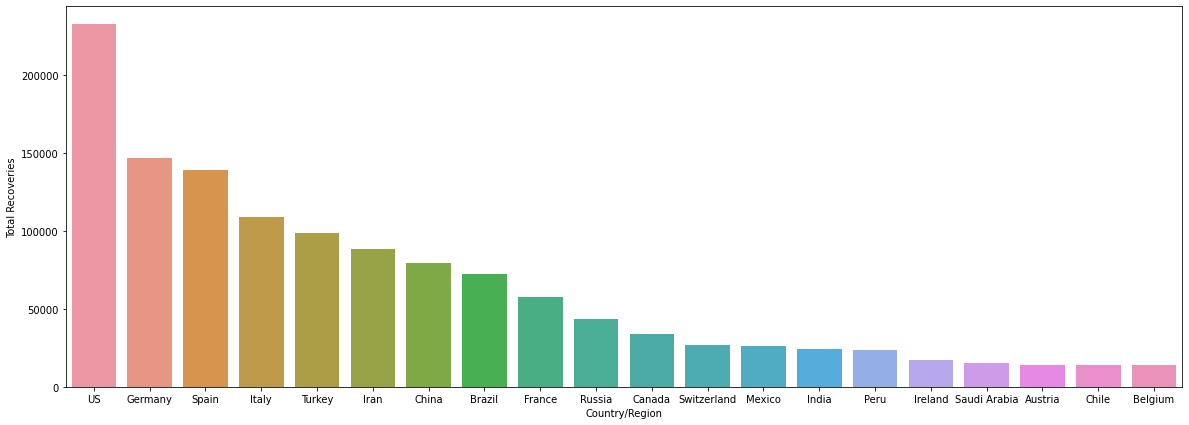

In [0]:
import seaborn as sns
TotalRecoveriesCasesCountrytop20=TotalRecoveriesCasesCountry.head(20)
plt.figure(figsize=(20,7))
sns.barplot(x=TotalRecoveriesCasesCountrytop20.index,y=TotalRecoveriesCasesCountrytop20['Total Recoveries'])
plt.show()

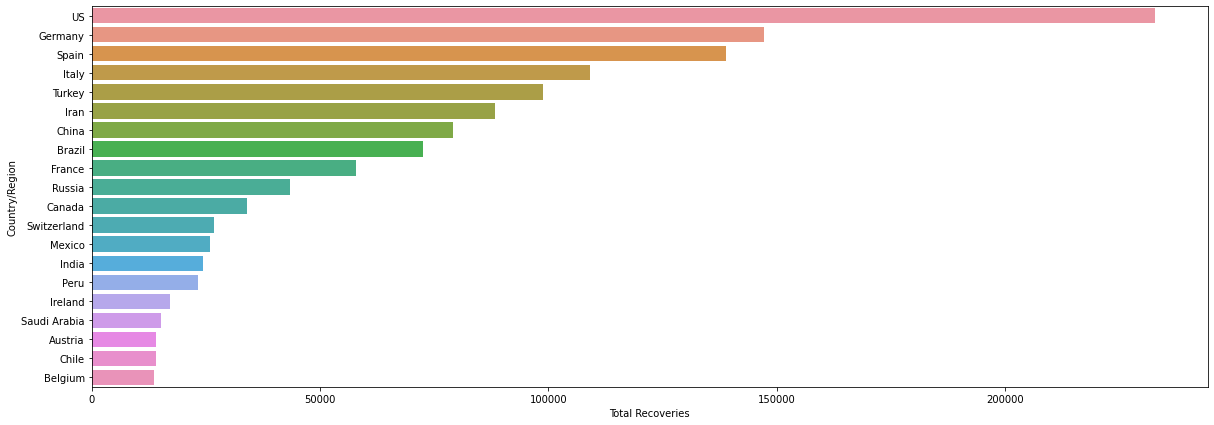

In [0]:
import seaborn as sns
TotalRecoveriesCasesCountrytop20=TotalRecoveriesCasesCountry.head(20)
plt.figure(figsize=(20,7))
sns.barplot(x=TotalRecoveriesCasesCountrytop20['Total Recoveries'],y=TotalRecoveriesCasesCountrytop20.index)
plt.show()

In [0]:
Top10countriesbycasesexclChina

,Total Confirmed Cases
Country/Region,
US,1347881
Spain,227436
United Kingdom,224332
Russia,221344
Italy,219814
France,177547
Germany,172576
Brazil,169594
Turkey,139771


In [0]:
TotalCasesCountry

,Total Confirmed Cases
Country/Region,
US,1347881
Spain,227436
United Kingdom,224332
Russia,221344
Italy,219814
...,...
MS Zaandam,9
Bhutan,9
Mauritania,8


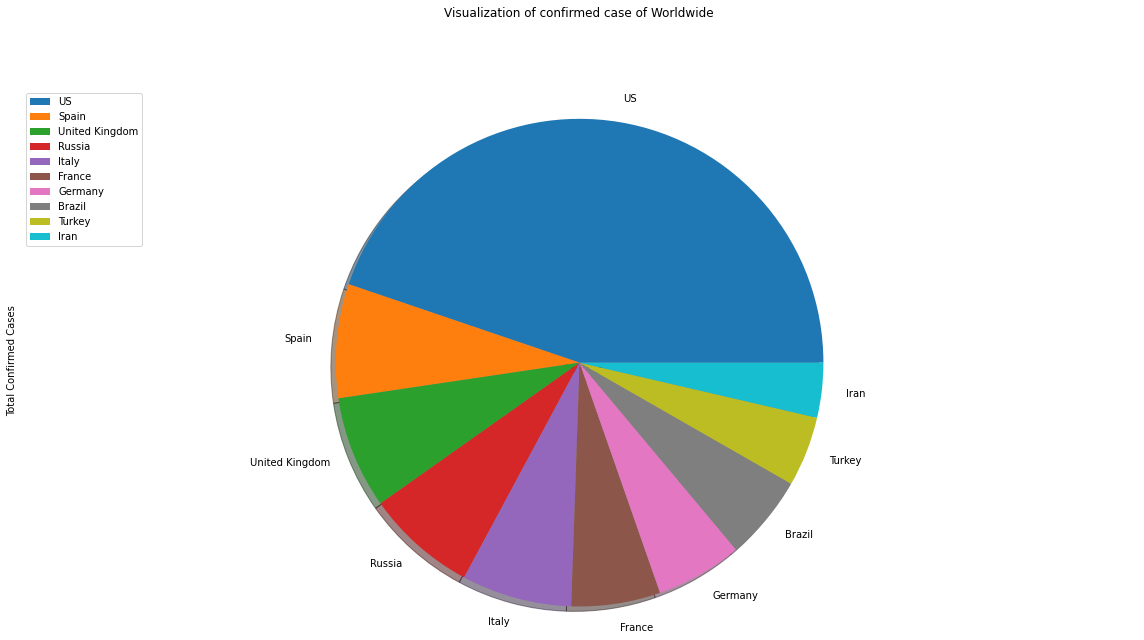

In [0]:
#explode_list = [0.1, 0.1, 0, 0, 0, 0.1, 0.10, 0, 0, 0.1, 0.1,0, 0.1, 0, 0, 0.1, 0.1,0.1, 0, 0, 0, 0.1, 0.1,0,0,0,0.1,0.1,0,0]
u=TotalCasesCountrytop10['Total Confirmed Cases'].plot(x=TotalCasesCountrytop10.index,y='Total Confirmed Cases',figsize=(20,10),title='Visualization of confirmed case of Worldwide',kind='pie' ,pctdistance=1.12,startangle=360,shadow=True )
plt.title('Visualization of confirmed case of Worldwide', y=1.12) 
plt.axis('equal')
plt.legend(labels=TotalCasesCountrytop10.index, loc='upper left')


In [0]:

USFirstCase=CountryConsolidated.loc['US']['Total Confirmed Cases'].reset_index().set_index('Date')
U=USFirstCase.rename(columns={'Total Confirmed Cases':'US Confirmed Case'})
SPFirstCase=CountryConsolidated.loc['Spain']['Total Confirmed Cases'].reset_index().set_index('Date')
S=SPFirstCase.rename(columns={'Total Confirmed Cases':'Spain Confirmed Case'})
ItalyFirstCase=CountryConsolidated.loc['Italy']['Total Confirmed Cases'].reset_index().set_index('Date')
I=ItalyFirstCase.rename(columns={'Total Confirmed Cases':'Italy Confirmed Case'})
UnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Total Confirmed Cases'].reset_index().set_index('Date')
UK=UnitedkingdomFirstCase.rename(columns={'Total Confirmed Cases':'United Kingdom Confirmed Case'})
SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')
Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})

USGrowth=U[U.ne(0)].dropna().reset_index()
SGrowth=S[S.ne(0)].dropna().reset_index()
IGrowth=I[I.ne(0)].dropna().reset_index()
UKGrowth=UK[UK.ne(0)].dropna().reset_index()
SingaporeGrowth=Si[Si.ne(0)].dropna().reset_index()

In [0]:
USGrowth

,Date,US Confirmed Case
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
106,2020-05-07,1257023
107,2020-05-08,1283929
108,2020-05-09,1309550
109,2020-05-10,1329260


Text(0, 0.5, 'US Confirmed Cases')

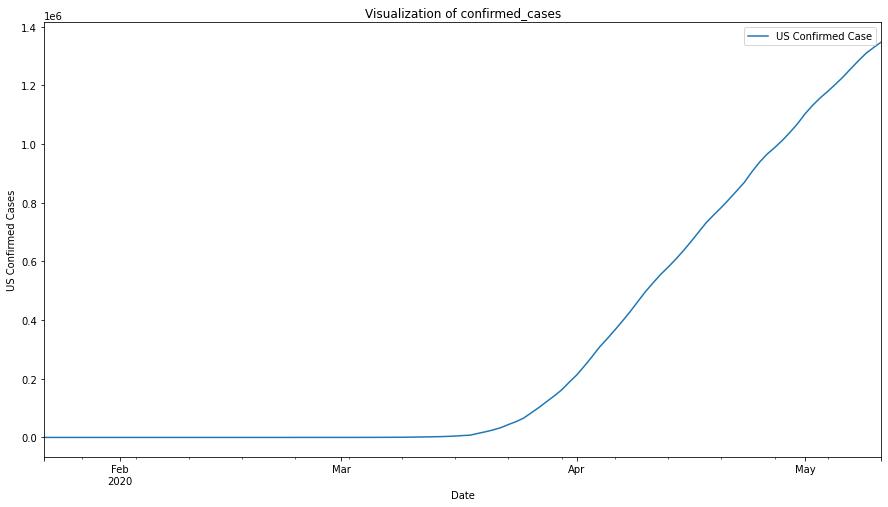

In [0]:
import matplotlib.pyplot as plt
d=USGrowth.plot(x='Date',y='US Confirmed Case',figsize=(15,8),title='Visualization of confirmed_cases')
a='US Confirmed Cases'
d.set_ylabel(a)

In [0]:
SingaporeGrowth

,Date,Singapore Confirmed Case
0,2020-01-23,1.0
1,2020-01-24,3.0
2,2020-01-25,3.0
3,2020-01-26,4.0
4,2020-01-27,5.0
...,...,...
105,2020-05-07,20939.0
106,2020-05-08,21707.0
107,2020-05-09,22460.0
108,2020-05-10,23336.0


In [0]:
fig = make_subplots(rows=2, cols=2,shared_xaxes=True,
                   subplot_titles=('US','Spain','Italy','United Kingdom'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=2, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=2, col=2)

fig.add_trace(go.Scatter(x=USGrowth['Date'],y=USGrowth['US Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=SGrowth['Date'],y=SGrowth['Spain Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=IGrowth['Date'],y=IGrowth['Italy Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)    
                           
fig.add_trace(go.Scatter(x=UKGrowth['Date'],y=UKGrowth['United Kingdom Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)  

fig.update_layout(showlegend=True)

In [0]:
USFirstCase=CountryConsolidated.loc['US'].reset_index()
'''USFirstCase=CountryConsolidated.loc['US','Total Confirmed Cases':'Death to Cases Ratio'].reset_index().set_index('Date')
U=USFirstCase.rename(columns={'Daily New Cases':'US daily new Cases'})
SPFirstCase=CountryConsolidated.loc['Spain']['Daily New Cases'].reset_index().set_index('Date')
S=SPFirstCase.rename(columns={'Daily New Cases':'Spain daily new Cases'})
ItalyFirstCase=CountryConsolidated.loc['Italy']['Daily New Cases'].reset_index().set_index('Date')
I=ItalyFirstCase.rename(columns={'Daily New Cases':'Italy daily new Cases'})
UnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Daily New Cases'].reset_index().set_index('Date')
UK=UnitedkingdomFirstCase.rename(columns={'Daily New Cases':'United Kingdom daily new Cases'})
#SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')
#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})

USGrowth=U[U.ne(0)].dropna().reset_index()
SGrowth=S[S.ne(0)].dropna().reset_index()
IGrowth=I[I.ne(0)].dropna().reset_index()
UKGrowth=UK[UK.ne(0)].dropna().reset_index()
#SingaporeGrowth=Si[Si.ne(0)].dropna().reset_index()'''

"USFirstCase=CountryConsolidated.loc['US','Total Confirmed Cases':'Death to Cases Ratio'].reset_index().set_index('Date')\nU=USFirstCase.rename(columns={'Daily New Cases':'US daily new Cases'})\nSPFirstCase=CountryConsolidated.loc['Spain']['Daily New Cases'].reset_index().set_index('Date')\nS=SPFirstCase.rename(columns={'Daily New Cases':'Spain daily new Cases'})\nItalyFirstCase=CountryConsolidated.loc['Italy']['Daily New Cases'].reset_index().set_index('Date')\nI=ItalyFirstCase.rename(columns={'Daily New Cases':'Italy daily new Cases'})\nUnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Daily New Cases'].reset_index().set_index('Date')\nUK=UnitedkingdomFirstCase.rename(columns={'Daily New Cases':'United Kingdom daily new Cases'})\n#SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')\n#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})\n\nUSGrowth=U[U.ne(0)].dropna().res

In [0]:
USFirstCase

,Date,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
0,2020-01-22,1,0.0,0,0.0,0,0.0,1,NaN,0.00
1,2020-01-23,1,0.0,0,0.0,0,0.0,1,NaN,0.00
2,2020-01-24,2,1.0,0,0.0,0,0.0,2,NaN,0.00
3,2020-01-25,2,0.0,0,0.0,0,0.0,2,NaN,0.00
4,2020-01-26,5,3.0,0,0.0,0,0.0,5,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
106,2020-05-07,1257023,27692.0,75662,2207.0,195036,5126.0,986325,0.72,0.06
107,2020-05-08,1283929,26906.0,77180,1518.0,198993,3957.0,1007756,0.72,0.06
108,2020-05-09,1309550,25621.0,78795,1615.0,212534,13541.0,1018221,0.73,0.06
109,2020-05-10,1329260,19710.0,79526,731.0,216169,3635.0,1033565,0.73,0.06


In [0]:
US=USFirstCase.dropna()
x1=US['Share of Recoveries - Closed Cases'].mean()
x1

0.6113978494623653

In [0]:
US=USFirstCase.dropna()
x2=US['Death to Cases Ratio'].mean()
x2

0.03278494623655915

In [0]:
USFirstCase['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
USFirstCase['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
USFirstCase

,Date,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
0,2020-01-22,1,0.0,0,0.0,0,0.0,1,0.611398,0.00
1,2020-01-23,1,0.0,0,0.0,0,0.0,1,0.611398,0.00
2,2020-01-24,2,1.0,0,0.0,0,0.0,2,0.611398,0.00
3,2020-01-25,2,0.0,0,0.0,0,0.0,2,0.611398,0.00
4,2020-01-26,5,3.0,0,0.0,0,0.0,5,0.611398,0.00
...,...,...,...,...,...,...,...,...,...,...
106,2020-05-07,1257023,27692.0,75662,2207.0,195036,5126.0,986325,0.720000,0.06
107,2020-05-08,1283929,26906.0,77180,1518.0,198993,3957.0,1007756,0.720000,0.06
108,2020-05-09,1309550,25621.0,78795,1615.0,212534,13541.0,1018221,0.730000,0.06
109,2020-05-10,1329260,19710.0,79526,731.0,216169,3635.0,1033565,0.730000,0.06


In [0]:
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Total Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Total Recoveries'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Daily New Cases'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=USFirstCase['Date'],y=USFirstCase['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
India=CountryConsolidated.loc['India'].reset_index()
India

,Date,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
0,2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
1,2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2,2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
3,2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
4,2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
106,2020-05-07,56351,3364.0,1889,104.0,16776,1445.0,37686,0.90,0.034
107,2020-05-08,59695,3344.0,1985,96.0,17887,1111.0,39823,0.90,0.033
108,2020-05-09,62808,3113.0,2101,116.0,19301,1414.0,41406,0.90,0.033
109,2020-05-10,67161,4353.0,2212,111.0,20969,1668.0,43980,0.90,0.033


In [0]:
India1=India.dropna()
x=India1['Share of Recoveries - Closed Cases'].mean()
#df1=India1.mean(axis=1)
y=India1['Death to Cases Ratio'].mean()

In [0]:
print(x)
print(y)

0.864883720930233
0.020267441860465116


In [0]:
print(x)
print(y)

0.864883720930233
0.020267441860465116


In [0]:
India['Death to Cases Ratio'].replace(np.nan,y,inplace=True)
India['Share of Recoveries - Closed Cases'].replace(np.nan,x,inplace=True)
India

,Date,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
0,2020-01-22,0,0.0,0,0.0,0,0.0,0,0.864884,0.020267
1,2020-01-23,0,0.0,0,0.0,0,0.0,0,0.864884,0.020267
2,2020-01-24,0,0.0,0,0.0,0,0.0,0,0.864884,0.020267
3,2020-01-25,0,0.0,0,0.0,0,0.0,0,0.864884,0.020267
4,2020-01-26,0,0.0,0,0.0,0,0.0,0,0.864884,0.020267
...,...,...,...,...,...,...,...,...,...,...
106,2020-05-07,56351,3364.0,1889,104.0,16776,1445.0,37686,0.900000,0.034000
107,2020-05-08,59695,3344.0,1985,96.0,17887,1111.0,39823,0.900000,0.033000
108,2020-05-09,62808,3113.0,2101,116.0,19301,1414.0,41406,0.900000,0.033000
109,2020-05-10,67161,4353.0,2212,111.0,20969,1668.0,43980,0.900000,0.033000


In [0]:
import requests
r = requests.get('https://api.covid19api.com/dayone/country/india')
#2916b1cfc52248f68b5ff5d01140b962
print(r)
#return r.text

<Response [200]>


In [0]:
import json
import datetime
jsondata=json.loads(r.text)
import pandas as pd
df=pd.DataFrame(jsondata)
#df=df.drop(['0'])
df=df.drop([len(df['Date'])-1])#to drop the dummy last rrow of the dataframe
df['Date']=pd.to_datetime(df['Date'])#yto convert date of object type into date-time type
df['Date']=df['Date'].dt.date#to convert date-timee to date in a dataframe
#df=df.drop(['Country','CountryCode','Province'	,'City'	,'CityCode',	'Lat',	'Lon'],axis=1)
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']
df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,India,IN,,,,20.59,78.96,1,0,0,1,2020-01-30
1,India,IN,,,,20.59,78.96,1,0,0,1,2020-01-31
2,India,IN,,,,20.59,78.96,1,0,0,1,2020-02-01
3,India,IN,,,,20.59,78.96,2,0,0,2,2020-02-02
4,India,IN,,,,20.59,78.96,3,0,0,3,2020-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...
96,India,IN,,,,20.59,78.96,49400,1693,14142,33565,2020-05-05
97,India,IN,,,,20.59,78.96,52987,1785,15331,35871,2020-05-06
98,India,IN,,,,20.59,78.96,56351,1889,16776,37686,2020-05-07
99,India,IN,,,,20.59,78.96,59695,1985,17887,39823,2020-05-08


In [0]:
import matplotlib.pyplot as plt
d=df.plot(x='Date',y='Confirmed',figsize=(15,8),title='Visualization of confirmed_cases')
a='Confirmed Cases'
d.set_ylabel(a)

KeyError: ignored

In [0]:
CountryConsolidated.loc['Germany']

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-07,169430,1268.0,7392,117.0,141700,1800.0,20338,0.95,0.044
2020-05-08,170588,1158.0,7510,118.0,141700,0.0,21378,0.95,0.044
2020-05-09,171324,736.0,7549,39.0,143300,1600.0,20475,0.95,0.044


In [0]:
!pip install pygal

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.2MB/s 


In [0]:
! pip install style

In [0]:
import pygal
import cufflinks as cf

In [0]:
df=CountryConsolidated
#df = cf.datagen.lines()
fig = df.iplot(asFigure=True,mode='lines+markers+text',
    #text=text,
    y='Total Confirmed Cases',
    opacity=0.9,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Total Confirmed Cases by Date')
fig.show()

In [0]:
c1=CountryConsolidated.loc['India']
c1

,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Date,,,,,,,,,
2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-08,59695,3344.0,1985,96.0,17887,1111.0,39823,0.90,0.033
2020-05-09,62808,3113.0,2101,116.0,19301,1414.0,41406,0.90,0.033
2020-05-10,67161,4353.0,2212,111.0,20969,1668.0,43980,0.90,0.033


In [0]:
fig=c1.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=c1.iplot(asFigure=True)
fig.show()

In [0]:

fig=c1.iplot(
    asFigure=True,
    mode='markers',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=c1.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=c1.iplot(
    asFigure=True,
      subplots=True, 
    subplot_titles=True, 
    legend=False,
    #kind='bar',
    #mode='lines+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    shape=(5,1), shared_xaxes=True, fill=True,
    title='Visualization of Corona Virus Spread by Date of India'
    )
fig.show()

In [0]:
#import style
fig=c1.iplot(
    asFigure=True,
      subplots=True, 
    subplot_titles=True,
    #shared_xaxes=True,
    #style=pygal.style.styles['default'](value_font_size=8), 
    #figsize=(20,10),
    legend=False,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    value_font_size=10,
    title='Total Confirmed Cases by Date'
    )
fig.show()

Exception: ignored

In [0]:
fig=c1.iplot(
    asFigure=True,
      subplots=True, 
    subplot_titles=True, 
    legend=False,
    kind='bar',
    mode='lines+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Total Confirmed Cases by Date'
    )
fig.show()

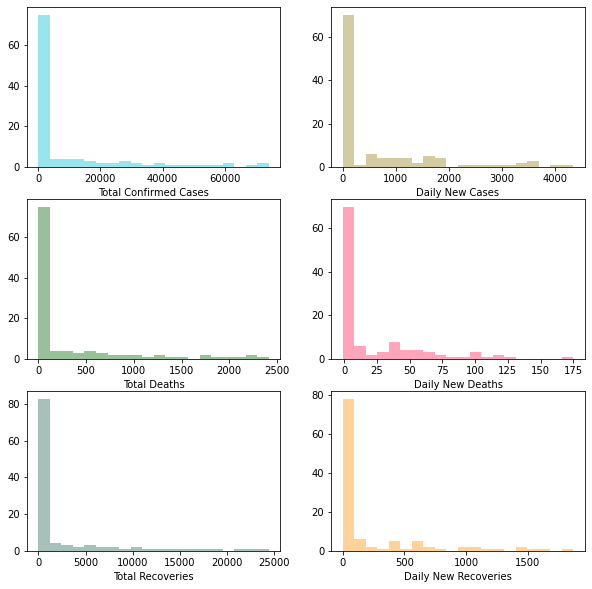

In [0]:
import seaborn as sns
fig1,axes=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
sns.distplot(c1['Total Confirmed Cases'],color='#00bcd4',ax=axes[0,0],kde=False,bins=20)
sns.distplot(c1['Daily New Cases'],color='#937d14',ax=axes[0,1],kde=False,bins=20)
sns.distplot(c1['Total Deaths'],color='#006600',ax=axes[1,0],kde=False,bins=20)
sns.distplot(c1['Daily New Deaths'],color='#ff1e56',ax=axes[1,1],kde=False,bins=20)
sns.distplot(c1['Total Recoveries'],color='#216353',ax=axes[2,0],kde=False,bins=20)
sns.distplot(c1['Daily New Recoveries'],color='#FF8F00',ax=axes[2,1],kde=False,bins=20)
#sns.distplot(c1[''],color='#33FF00',ax=axes=[2,0],kde=False,bins=20)
#sns.distplot(c1[''],color='#FF3300',ax=axes=[2,1],kde=False,bins=20)
#sns.distplot(c1[''],color='#CCCC00',ax=axes=[2,2],kde=False,bins=20)
plt.show()

In [0]:
fig = go.Figure(data=[
    go.Bar(name='Daily New Deaths', x=c1.index, y=c1['Daily New Deaths'],marker_color='crimson',marker_line_color='black'),
    go.Bar(name='Daily New Recoveries', x=c1.index, y=c1['Daily New Recoveries'],marker_color='limegreen',marker_line_color='black'),
    go.Bar(name='Daily New Cases', x=c1.index, y=c1['Daily New Cases'],marker_color='royalblue',marker_line_color='black'),
])
# Change the bar mode
fig.update_layout(template="simple_white",barmode='relative', title='Total Cases, Deaths & Recoveries',
                 annotations=[dict(x='2020-03-23', y=103, xref="x", yref="y", text="First Lockdown(23rd March)", showarrow=True, arrowhead=1, ax=-100, ay=-100),
                              dict(x='2020-04-15', y=835, xref="x", yref="y", text="Second Lockdown(15th April)", showarrow=True, arrowhead=1, ax=-100, ay=-100),
                              dict(x='2020-05-04', y=3932, xref="x", yref="y", text="Third Lockdown(4th May)", showarrow=True, arrowhead=1, ax=-100, ay=-100)])
fig.show()

In [0]:
%%HTML
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2061549" data-url="https://flo.uri.sh/visualisation/2061549/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>


https://plotly.com/python/cufflinks/

In [0]:
I=CountryConsolidated.loc['India']['Total Confirmed Cases'].reset_index().set_index('Date')
#U=USFirstCase.rename(columns={'Total Confirmed Cases':'US Confirmed Case'})
P=CountryConsolidated.loc['Pakistan']['Total Confirmed Cases'].reset_index().set_index('Date')
#S=SPFirstCase.rename(columns={'Total Confirmed Cases':'Spain Confirmed Case'})
N=CountryConsolidated.loc['Nepal']['Total Confirmed Cases'].reset_index().set_index('Date')
#I=ItalyFirstCase.rename(columns={'Total Confirmed Cases':'Italy Confirmed Case'})
Bh=CountryConsolidated.loc['Bhutan']['Total Confirmed Cases'].reset_index().set_index('Date')
#UK=UnitedkingdomFirstCase.rename(columns={'Total Confirmed Cases':'United Kingdom Confirmed Case'})
Ba=CountryConsolidated.loc['Bangladesh']['Total Confirmed Cases'].reset_index().set_index('Date')
#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})
#Sr=CountryConsolidated.loc['Srilanka']['Total Confirmed Cases'].reset_index().set_index('Date')
C=CountryConsolidated.loc['China']['Total Confirmed Cases'].reset_index().set_index('Date')


I1=I[I.ne(0)].dropna().reset_index()
P1=P[P.ne(0)].dropna().reset_index()
N1=N[N.ne(0)].dropna().reset_index()
Bh1=Bh[Bh.ne(0)].dropna().reset_index()
Ba1=Ba[Ba.ne(0)].dropna().reset_index()
#Sr1=Sr[Sr.ne(0)].dropna().reset_index()
C1=C[C.ne(0)].dropna().reset_index()


In [0]:
fig = make_subplots(rows=3, cols=2,shared_xaxes=True,
                   subplot_titles=('India','Pakistan','Bangladesh','Nepal','Bhutan','China'))

fig.add_trace(go.Scatter(x=I1['Date'],y=I1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='India Total Confirmed Cases',
                          row=1,col=1)
fig.add_trace(go.Scatter(x=P1['Date'],y=P1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Pakistan Total Confirmed Cases',
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Ba1['Date'],y=Ba1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=2,col=1)    
                           
fig.add_trace(go.Scatter(x=N1['Date'],y=N1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=2,col=2)
  
fig.add_trace(go.Scatter(x=Bh1['Date'],y=Bh1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=3,col=1)

fig.add_trace(go.Scatter(x=C1['Date'],y=C1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases', 
                          row=3,col=2)
fig.update_layout(template='plotly_white',showlegend=False,title='bmn')

SyntaxError: ignored

In [0]:
CountryConsolidated.reset_index().set_index('Country/Region')

,Date,Total Confirmed Cases,Daily New Cases,Total Deaths,Daily New Deaths,Total Recoveries,Daily New Recoveries,Active Cases,Share of Recoveries - Closed Cases,Death to Cases Ratio
Country/Region,,,,,,,,,,
Afghanistan,2020-01-22,0,0.0,0,0.0,0,0.0,0,NaN,NaN
Afghanistan,2020-01-23,0,0.0,0,0.0,0,0.0,0,NaN,NaN
Afghanistan,2020-01-24,0,0.0,0,0.0,0,0.0,0,NaN,NaN
Afghanistan,2020-01-25,0,0.0,0,0.0,0,0.0,0,NaN,NaN
Afghanistan,2020-01-26,0,0.0,0,0.0,0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2020-05-07,34,0.0,4,0.0,5,0.0,25,0.56,0.118
Zimbabwe,2020-05-08,34,0.0,4,0.0,9,4.0,21,0.69,0.118
Zimbabwe,2020-05-09,35,1.0,4,0.0,9,0.0,22,0.69,0.114


In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
GlobalTotals.columns

Index(['Total Confirmed Cases', 'Daily New Cases', 'Total Deaths',
       'Daily New Deaths', 'Total Recoveries', 'Daily New Recoveries',
       'Active Cases', 'Share of Recoveries - Closed Cases',
       'Death to Cases Ratio'],
      dtype='object')

In [0]:

fig = go.Figure()
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Cases']))
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Deaths']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Deaths']))
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Recoveries']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Recoveries']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Share of Recoveries - Closed Cases']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Death to Cases Ratio']))



fig.update_layout(barmode='relative', title_text='Relative Barmode')
fig.show()

In [5]:
pip install pygooglechart==0.4.0


  Created wheel for pygooglechart: filename=pygooglechart-0.4.0-cp36-none-any.whl size=21996 sha256=f31d63981124e942f51dc736137ca5f0196bbd79101d875cda21735f55c672d4
  Stored in directory: /root/.cache/pip/wheels/3d/49/3a/b6b674613fefd1b8939e0bb368028230f0463455bb75d4e590
Successfully built pygooglechart


In [0]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = GlobalTotals['Recovered']
categories = GlobalTotals['Country/Region']
explode = list(np.zeros(len(data)))
listed = list(sorted(data))[-3:]
explode[list(data).index(listed[0])] = 0.1
explode[list(data).index(listed[1])] = 0.05
explode[list(data).index(listed[2])] = 0.1

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20b.colors,
                                 startangle=140,
                                 explode = explode)

# Decoration
ax.legend(wedges, categories, title="Countries/Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Pie Diagram of Recoveries by CoronaVirus")
plt.show()